# Sprint5 機械学習スクラッチ SVM
## 1.このSprintについて
### Sprintの目的
- スクラッチを通してSVMを理解する
- 線形モデルと異なる手法に触れる

### どのように学ぶか
スクラッチでSVMを実装した後、学習と検証を行なっていきます。

## 2.SVMスクラッチ
分類のためのサポートベクターマシン（SVM、サポートベクトルマシン）のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

SVMには学習時に分類の間違いを認めるソフトマージンSVMと、認めないハードマージンSVMがありますが、ここでは実装が単純なハードマージンSVMを扱います。

以下に雛形を用意してあります。このScratchSVMClassifierクラスにコードを書き加えていってください。

雛形
```
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """

    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose

    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証用データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """

        pass
        return
```

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題1】ラグランジュの未定乗数法による最急降下
SVMの学習は、ラグランジュの未定乗数法を用います。サンプル数分のラグランジュ乗数$\lambda$を用意して、以下の式により更新していきます。この計算を行うメソッドをScratchSVMClassifierクラスに実装してください。
$$\lambda_i^{new} = \lambda_i + \alpha\left(1 - \sum_{j=1}^n\lambda_jy_iy_jk(x_i, x_j)\right)$$

ここで$k(x_i, x_j)$はカーネル関数です。線形カーネルの場合は次のようになります。他のカーネル関数にも対応できるように、この部分は独立したメソッドとしておきましょう。
$$k(x_i, x_j) = x_i^Tx_j$$

条件として、更新毎に$\lambda_i \geq 0$を満たす必要があります。満たさない場合は$\lambda_i = 0$とします。

$i,j$ : サンプルのインデックス

$\lambda^{new}_i$ : 更新後のi番目のサンプルのラグランジュ乗数

$\lambda_i$ : 更新前のi番目のサンプルのラグランジュ乗数

$\alpha$ : 学習率

$\lambda_j$ : j番目のサンプルのラグランジュ乗数

$y_i$ : i番目のサンプルのラベル

$y_j$ : j番目のサンプルのラベル

$x_i$ : i番目のサンプルの特徴量ベクトル

$x_J$ : j番目のサンプルの特徴量ベクトル

あるサンプルに対しての全てのサンプルとの関係を計算していくことになります。

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題2】サポートベクターの決定
計算したラグランジュ乗数$\lambda$が設定した閾値より大きいサンプルをサポートベクターとして扱います。推定時にサポートベクターが必要になります。サポートベクターを決定し、インスタンス変数として保持しておくコードを書いてください。

閾値はハイパーパラメータですが、1e-5程度からはじめると良いでしょう。サポートベクターの数を出力させられるようにしておくと学習がうまく行えているかを確認できます。

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題3】推定
推定時には、推定したいデータの特徴量とサポートベクターの特徴量をカーネル関数によって計算します。求めた$f(x)$の符号が分類結果です。
$$f(x) = \sum_{n=1}^N\lambda_ny_{sv_n}k(x, s_n)$$

$x$ : 推定したいデータの特徴量ベクトル

$N$ : サポートベクターの数

$n$ : サポートベクターのインデックス

$\lambda_n$ : n番目のサポートベクターのラグランジュ乗数

$y_{sv_n}$ : n番目のサポートベクターのラベル

$k() : カーネル関数

$s_n$ : n番目のサポートベクターの特徴量

In [1]:
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random

In [2]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """

    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        kernel_list = ['linear', 'polly']
        assert kernel in kernel_list, "kernelは'linear', 'polly'で入力してください"
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証用データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
                    
        self.k = self.kernel_func(X, X)
        λ = np.random.RandomState(0).rand(len(y)) # λの初期値をランダムに設定
        λ_new = np.copy(λ)
        
        for iter in range(self.iter):
            for i in range(len(λ)):                
                λ_new[i] = λ[i] + self.lr * (1 - sum(λ*y[i]*y*self.k[i]))
                
                if λ_new[i] < 0:
                    λ_new[i] = 0

            λ = λ_new
            
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("{} 回目のλ\n{}\n".format(iter+1, λ))
                print(sum(λ))
        
        self.index_support_vectors = np.where(λ>self.threshold)
        self.n_support_vectors = np.size(svm.index_support_vectors)

        self.X_sv = X[self.index_support_vectors]
        self.lam_sv = λ[self.index_support_vectors]
        self.y_sv = y[self.index_support_vectors]

    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        y_pred = self.kernel_func(X, self.X_sv) @ (self.lam_sv * self.y_sv) 
        y_pred = np.where(np.where(y_pred>0, 1, y_pred)<0, -1, np.where(y_pred>0, 1, y_pred)).astype(int)
        return y_pred
    
    def kernel_func(self, Xi, Xj):
        if self.kernel == 'linear':
            self.k = Xi @ Xj.T
            return self.k
        else:
            gamma = random.random()
            theta = random.random()
            d = 1
            self.k = gamma * (Xi @ Xj.T + theta)**d
            return self.k 

## 3.検証
＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題4】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット1の2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [3]:
# シンプルデータセットの作成
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [4]:
# データを分割する関数
def scratch_train_test_split(X, y, train_size=0.8,):
    assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray), 'Xとyの型はndarrayにしてください' # X,yがndarray型でない場合はエラーを発生させる
    assert X.shape[0] == len(y), 'Xの行数とyの列数がそろっていません。\nXの列数：{} \nyの行数：{}'.format(X.shape[0], len(y)) # X,yの行列数が合っていない場合ははエラーを発生させる
    np.random.seed(0) # 再現性を保つためシードを固定
    permutation = np.random.permutation(len(y)) # X, yをシャッフルする乱数を作成
    x_shuffle = X[permutation] # Xをシャッフルさせる
    y_shuffle = y[permutation] # yをシャッフルさせる
    num = round(len(y) * train_size) # 分割点を取得
    
    X_train = x_shuffle[:][:num] # Xを分割しX_trainを作成
    X_test = x_shuffle[:][num:] # 分割したXの残りでX_testを作成
    y_train = y_shuffle[:num] # yを分割しy_trainを作成
    y_test = y_shuffle[num:] # 分割したyの残りでy_testを作成
    
    return X_train, X_test, y_train, y_test

In [5]:
# 評価指標を計算する関数
def evaluate(y_true, y_pred, label=1):
    """
    2値分類の評価指標を計算する
    """
    acc = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, pos_label=label)
    recall = metrics.recall_score(y_test, y_pred, pos_label=label)
    f1 = metrics.f1_score(y_test, y_pred, pos_label=label)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    return acc, precision, recall, f1, confusion

In [6]:
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y) # データを分割

svm = ScratchSVMClassifier(num_iter=100, lr=0.01, verbose=False)
svm.fit(X_train, y_train, X_test, y_test) # 学習させる
y_pred = svm.predict(X_test) # 推定する

print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate(y_test, y_pred)))

acc : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
confusion matrix 
 [[56  0]
 [ 0 44]]


＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題5】決定領域の可視化
決定領域を可視化してください。

以下の例のようにサポートベクターは異なる色で示してください。

In [7]:
# グラフを描画する関数
def decision_region(X, y, model, step=0.01, title="decision region' SVM",
                    feature_names=[None, None], target_names=[None, None]):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step),
                                    np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    #y_pred = np.where(y_pred==np.unique(y_pred)[0], 0, 1)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i],
                    label=target_names[i], marker='o')
    
    plt.scatter(model.X_sv[:, 0], model.X_sv[:, 1], s=80, color='y', label='support vectors', marker='o')
    
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

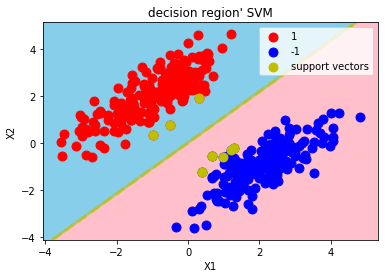

In [8]:
decision_region(X_train, y_train, svm, target_names=[1, -1]) # グラフを描画

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題6】（アドバンス課題）多項式カーネル関数の作成
最初に作成した実装では線形カーネルを使用していました。多項式カーネルにも切り替えられるようにしましょう。

「線形カーネルの式」
$$k(x_i, x_j) = x_i^Tx_j$$

「多項式カーネルの式」
$$k(x_i, x_j) = \gamma(x_i^Tx_j + \theta_0)^d$$

$\gamma$, $\theta_0$, $d$はハイパーパラメータです。

線形カーネルは$\gamma = 1, 　\theta_0 = 0, 　d = 1$ の場合の多項式カーネルと等しいと言えます。

acc : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
confusion matrix 
 [[56  0]
 [ 0 44]]


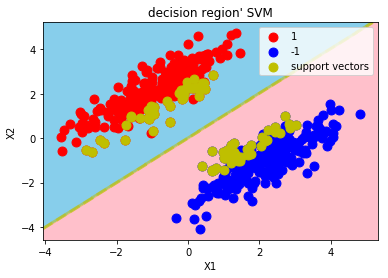

In [9]:
svm = ScratchSVMClassifier(num_iter=10, lr=0.01, verbose=False, threshold=1e-5, kernel='polly')
svm.fit(X_train, y_train, X_test, y_test) # 学習させる
y_pred = svm.predict(X_test) # 推定する
print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate(y_test, y_pred)))

decision_region(X, y, svm, target_names=[1, -1]) # グラフを描画